In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from tensorflow import keras 

In [2]:
(X_train , y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
len(X_train)

60000

In [5]:
len (y_train)

60000

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
X_train = X_train/255 ## scaled the values we know the values are btwn 0 and 255 so dividing them by 255 scales them btwn 0 and 1 
X_test = X_test/255

In [8]:
#flatten our traingin dataset cuz we need to conver it into a single dimensional array cuz we nned to feed it to the nerual net 

X_train_flattened = X_train.reshape(len(X_train),28*28)

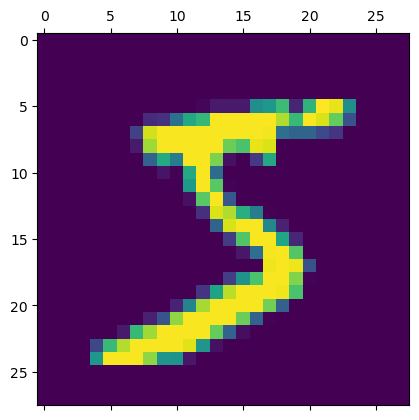

In [9]:
plt.matshow(X_train[0])

In [10]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')  
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Since labels are integers
    metrics=['accuracy']  
)
model.fit(X_train_flattened,y_train,epochs=5)

C:\Users\kulu1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8101 - loss: 0.7245
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9129 - loss: 0.3152
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9198 - loss: 0.2862
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9244 - loss: 0.2698
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9252 - loss: 0.2668


In [12]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9170 - loss: 0.3005


[0.26532357931137085, 0.9261999726295471]

In [13]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step


In [14]:
y_predicted[0]

array([1.4996150e-02, 4.2370871e-07, 4.7299616e-02, 9.5147884e-01,
       1.3760357e-03, 1.2301256e-01, 1.9537770e-06, 9.9981707e-01,
       9.6526489e-02, 7.1574700e-01], dtype=float32)

In [15]:
y_predicted[0].max()

0.9998171

In [16]:
np.argmax(y_predicted[0])

7

In [17]:
#nned to convert the predictions to concrete class labels
y_predicted_labels = [ np.argmax(i) for i in y_predicted ]

In [18]:
cm =tf.math.confusion_matrix(labels = y_test , predictions = y_predicted_labels )

Text(95.72222222222221, 0.5, 'Truth')

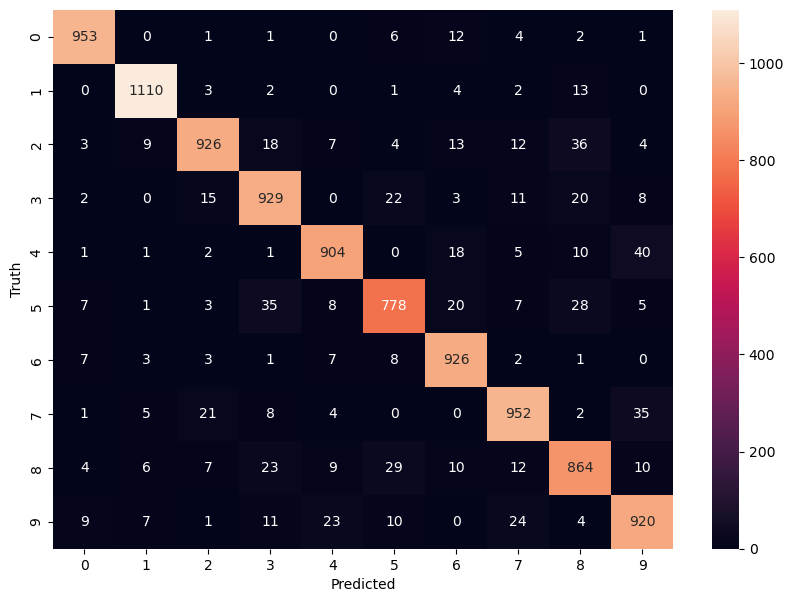

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
#basically tells us how much time the predictions were right like it predicted 950 times right that it was a 2 bascially the diagonal values
# anything other than diagonal values are wrong predictions numbers 


In [21]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),#adding a relu layer 
    keras.layers.Dense(10,activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Since labels are integers
    metrics=['accuracy']  
)
model.fit(X_train_flattened,y_train,epochs=5)

C:\Users\kulu1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8742 - loss: 0.4517
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9627 - loss: 0.1299
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9756 - loss: 0.0836
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9817 - loss: 0.0633
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9845 - loss: 0.0504


In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='tanh'),#adding a relu layer 
    keras.layers.Dense(10,activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Since labels are integers
    metrics=['accuracy']  
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8734 - loss: 0.4513
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9559 - loss: 0.1543
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9713 - loss: 0.1042
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9785 - loss: 0.0752
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9836 - loss: 0.0580


In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100 , activation='relu'),#adding a relu layer 
    keras.layers.Dense(10,activation='sigmoid')
    
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Since labels are integers
    metrics=['accuracy']  
)
model.fit(X_train,y_train,epochs=5)

C:\Users\kulu1\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8724 - loss: 0.4450
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9622 - loss: 0.1301
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9730 - loss: 0.0884
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9811 - loss: 0.0624
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9848 - loss: 0.0498


In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  
    keras.layers.Dense(100, activation='relu'),                   
    keras.layers.Dense(10, activation='softmax') 
])


model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)

# Train the model
model.fit(X_train, y_train, epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7255 - loss: 1.0632
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9005 - loss: 0.3540
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9165 - loss: 0.2967
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9233 - loss: 0.2720
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9324 - loss: 0.2406
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9352 - loss: 0.2262
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9424 - loss: 0.2101
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9450 - loss: 0.1946
